# MIS 311: Introduction to Business Analytics
### Assignment 1: Personal Portfolio Site

###### Dinh Nho Thanh Binh
###### 2132300011


## 1. Data Overview

**The dataset (10_Supermarket Sale)** is a record of sales transactions from a retail business with physical store locations in multiple cities. It captures details about each sale, including the products purchased, the customer type, and the transaction value. This type of data is often used to analyze sales performance, customer behavior, and product popularity.

**Data Types**: The dataset includes a variety of data types:

Categorical Data: branch, city, customer_type, product_name, and product_category.

Numerical Data:

*   Discrete Data: quantity is discrete data because you can count the number of items sold.
*   Continuous Data: total_price is continuous data because it can have any value.

Identifier: sale_id serves as a unique identifier for each transaction.

In [ ]:
# Import pandas
import pandas as pd
import numpy as np

In [ ]:
# Read data file
df= pd.read_excel("/content/10_Supermarket Sale.xlsx")
df

,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
0,1,A,New York,Member,Shampoo,Personal Care,3.0,17.66
1,2,B,Los Angeles,Normal,Notebook,Stationery,10.0,29.43
2,3,A,New York,Member,Apple,Fruits,15.0,19.26
3,4,A,Chicago,Normal,Detergent,Household,5.0,41.73
4,5,B,Los Angeles,Member,Orange Juice,Beverages,7.0,26.22
...,...,...,...,...,...,...,...,...
248,246,A,New York,Member,Notebook,Beverages,9.0,176.23
249,247,A,Chicago,Normal,Detergent,Beverages,3.0,28.28
250,248,A,New York,Member,Apple,Fruits,17.0,246.11
251,249,A,New York,Normal,Detergent,Personal Care,19.0,195.37


In [ ]:
df.count()

,0
sale_id,253
branch,253
city,253
customer_type,250
product_name,253
product_category,247
quantity,250
total_price,253


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           253 non-null    int64  
 1   branch            253 non-null    object 
 2   city              253 non-null    object 
 3   customer_type     250 non-null    object 
 4   product_name      253 non-null    object 
 5   product_category  247 non-null    object 
 6   quantity          250 non-null    float64
 7   total_price       253 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 15.9+ KB


## 2. Data Cleaning

**Identify any duplicate rows and remove duplicate rows if necessary**

There are three duplicate rows in these dataset, so I will remove it

In [ ]:
# Find duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Duplicate Rows :")
print(duplicate_rows_df)
# Remove duplicate rows
df_cleaned = df.drop_duplicates()
print("\nDataFrame after removing duplicates:")
df_cleaned

Duplicate Rows :
    sale_id branch         city customer_type  product_name product_category  \
13       13      A     New York        Normal  Orange Juice        Household   
27       26      B  Los Angeles        Normal      Notebook           Fruits   
42       40      A     New York        Normal         Apple           Fruits   

    quantity  total_price  
13       4.0        14.08  
27      16.0       238.65  
42      11.0        13.77  

DataFrame after removing duplicates:


,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
0,1,A,New York,Member,Shampoo,Personal Care,3.0,17.66
1,2,B,Los Angeles,Normal,Notebook,Stationery,10.0,29.43
2,3,A,New York,Member,Apple,Fruits,15.0,19.26
3,4,A,Chicago,Normal,Detergent,Household,5.0,41.73
4,5,B,Los Angeles,Member,Orange Juice,Beverages,7.0,26.22
...,...,...,...,...,...,...,...,...
248,246,A,New York,Member,Notebook,Beverages,9.0,176.23
249,247,A,Chicago,Normal,Detergent,Beverages,3.0,28.28
250,248,A,New York,Member,Apple,Fruits,17.0,246.11
251,249,A,New York,Normal,Detergent,Personal Care,19.0,195.37


**Identify missing values and decide how to handle these missing values**

To handling Missing customer_type, I will impute using the mode (most frequent value) of customer_type within the same branch and city. It's based on the logical assumption that customers in the same geographic location are likely to have similar characteristics.

To handling Missing product_category, I impute based on the most frequent product_category for the corresponding product_name.
It is highly likely that a specific product like Shampoo will always fall under the same category Personal Care.

To etimating Missing quantity, I impute by estimating quantity using the median unit price for the same product_name in the same branch and city, then calculating quantity = total_price / median_unit_price.
Because  median unit price is less sensitive to extreme prices (outliers) than the mean.


In [ ]:
# Identify missing values
print("\nMissing values before handling:")
print(df_cleaned.isnull().sum())


Missing values before handling:
sale_id             0
branch              0
city                0
customer_type       3
product_name        0
product_category    6
quantity            3
total_price         0
dtype: int64


In [ ]:
df_before_imputation = df.drop_duplicates().copy()
missing_before_imputation = df_before_imputation[df_before_imputation.isnull().any(axis=1)]
df_after_imputation = df_before_imputation.copy()
for index, row in df_after_imputation[df_after_imputation['customer_type'].isna()].iterrows():
    mode_value = df_after_imputation[(df_after_imputation['branch'] == row['branch']) & (df_after_imputation['city'] == row['city'])]['customer_type'].mode()
    if not mode_value.empty:
        df_after_imputation.loc[index, 'customer_type'] = mode_value[0]
df_after_imputation['product_category'] = df_after_imputation.groupby('product_name')['product_category'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
df_after_imputation['unit_price'] = np.nan
valid_quantity_mask = df_after_imputation['quantity'].notna()
df_after_imputation.loc[valid_quantity_mask, 'unit_price'] = df_after_imputation.loc[valid_quantity_mask, 'total_price'] / df_after_imputation.loc[valid_quantity_mask, 'quantity']
median_unit_prices = df_after_imputation.groupby(['product_name', 'branch', 'city'])['unit_price'].transform('median')
missing_quantity_mask = df_after_imputation['quantity'].isnull()
df_after_imputation.loc[missing_quantity_mask, 'quantity'] = (df_after_imputation.loc[missing_quantity_mask, 'total_price'] / median_unit_prices[missing_quantity_mask]).round().astype(int)


imputed_rows = df_after_imputation.loc[missing_before_imputation.index]

print("Original rows with missing values:")
display(missing_before_imputation)

print("\nRows after imputation:")
display(imputed_rows[['customer_type', 'product_category', 'quantity']])

Original rows with missing values:


,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
20,20,A,Chicago,Normal,Detergent,Personal Care,NaN,59.75
31,30,A,Chicago,Member,Orange Juice,NaN,15.0,198.54
32,31,A,Chicago,NaN,Shampoo,Fruits,3.0,11.88
33,32,A,New York,Member,Orange Juice,NaN,3.0,17.30
36,35,A,New York,NaN,Apple,Personal Care,2.0,28.72
46,44,A,Chicago,NaN,Detergent,Fruits,NaN,43.08
51,49,B,Los Angeles,Normal,Detergent,NaN,2.0,13.50
63,61,A,New York,Member,Detergent,Household,NaN,20.09
70,68,A,New York,Normal,Detergent,NaN,1.0,7.22
89,87,A,Chicago,Member,Shampoo,NaN,2.0,5.86



Rows after imputation:


,customer_type,product_category,quantity
20,Normal,Personal Care,5.0
31,Member,Household,15.0
32,Member,Fruits,3.0
33,Member,Household,3.0
36,Member,Personal Care,2.0
46,Member,Fruits,4.0
51,Normal,Household,2.0
63,Member,Household,2.0
70,Normal,Household,1.0
89,Member,Fruits,2.0


In [ ]:
df_cleaned.shape

(250, 8)

*Number of Rows and Columns: The dataset contains 250 rows (as indicated by the sale_id column) and 8 columns.*

## 3. Descriptive Statistics

In [ ]:
df_cleaned[["quantity","total_price"]].describe()

,quantity,total_price
count,247.000000,250.000000
mean,10.611336,124.185120
std,6.027271,102.984826
min,1.000000,2.180000
25%,5.000000,40.892500
50%,11.000000,95.430000
75%,16.000000,194.935000
max,20.000000,427.140000


In [ ]:
# Calculate total sales
total_sales = df_cleaned['total_price'].sum()
print(f"Total Sales: {total_sales:.2f}")

# Calculate average transaction value
average_transaction_value = df_cleaned['total_price'].mean()
print(f"Average Transaction Value: {average_transaction_value:.2f}")

# Calculate average number of items per sale
average_quantity = df_cleaned['quantity'].mean()
print(f"Average Quantity per Sale: {average_quantity:.2f}")

Total Sales: 31046.28
Average Transaction Value: 124.19
Average Quantity per Sale: 10.61


In [ ]:
# Group by city and calculate total sales, average sales, and number of transactions
city_analysis = df_cleaned.groupby('city').agg(
    total_sales=('total_price', 'sum'),
    average_sales=('total_price', 'mean'),
    number_of_transactions=('sale_id', 'count')
).reset_index()

print("Sales Analysis by City:")
display(city_analysis)

Sales Analysis by City:


,city,total_sales,average_sales,number_of_transactions
0,Chicago,11133.05,144.585065,77
1,Los Angeles,8948.81,114.728333,78
2,New York,10964.42,115.414947,95


In [ ]:
# Group by product_category and product_name and calculate total sales, average sales, and number of transactions
product_analysis = df_cleaned.groupby(['product_category', 'product_name']).agg(
    total_sales=('total_price', 'sum'),
    average_sales=('total_price', 'mean'),
    number_of_transactions=('sale_id', 'count')
).reset_index()

print("Sales Analysis by Product Category and Product Name:")
display(product_analysis)

Sales Analysis by Product Category and Product Name:


,product_category,product_name,total_sales,average_sales,number_of_transactions
0,Beverages,Apple,835.41,83.541000,10
1,Beverages,Detergent,564.14,94.023333,6
2,Beverages,Notebook,2339.56,167.111429,14
3,Beverages,Orange Juice,1295.69,161.961250,8
4,Beverages,Shampoo,1428.37,158.707778,9
5,Fruits,Apple,1543.64,140.330909,11
6,Fruits,Detergent,795.55,113.650000,7
7,Fruits,Notebook,1602.35,133.529167,12
8,Fruits,Orange Juice,1276.54,116.049091,11
9,Fruits,Shampoo,2287.00,134.529412,17


In [ ]:
# Group by customer_type and calculate total sales, average sales, and number of transactions
customer_type_analysis = df_cleaned.groupby('customer_type').agg(
    total_sales=('total_price', 'sum'),
    average_sales=('total_price', 'mean'),
    number_of_transactions=('sale_id', 'count')
).reset_index()

print("Sales Analysis by Customer Type:")
display(customer_type_analysis)

Sales Analysis by Customer Type:


,customer_type,total_sales,average_sales,number_of_transactions
0,Member,17855.87,136.304351,131
1,Normal,13106.73,112.989052,116


# Visualize the data.

# Box plots

Create box plots to compare the distribution of total_price for each city

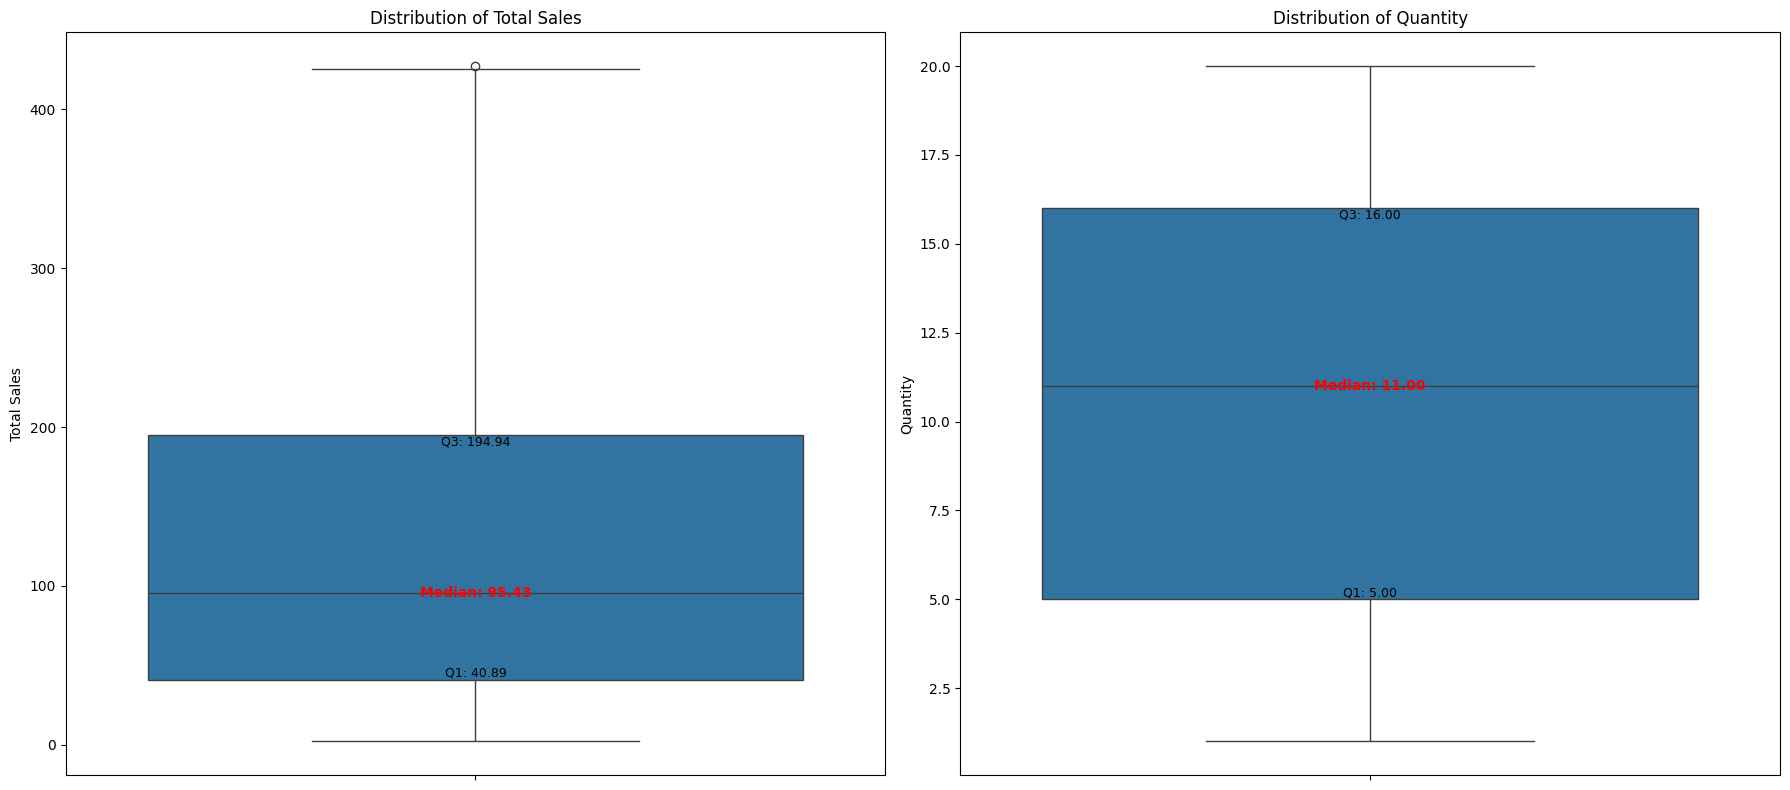

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Box plot for total_price
sns.boxplot(y=df_cleaned['total_price'], ax=axes[0])
axes[0].set_title('Distribution of Total Sales')
axes[0].set_ylabel('Total Sales')

# Annotations for total_price
q1_price = np.percentile(df_cleaned['total_price'], 25)
median_price = np.median(df_cleaned['total_price'])
q3_price = np.percentile(df_cleaned['total_price'], 75)
axes[0].text(0, q1_price, f'Q1: {q1_price:.2f}', ha='center', va='bottom', color='black', fontsize=9)
axes[0].text(0, median_price, f'Median: {median_price:.2f}', ha='center', va='center', color='red', fontsize=10, fontweight='bold')
axes[0].text(0, q3_price, f'Q3: {q3_price:.2f}', ha='center', va='top', color='black', fontsize=9)

# Box plot for quantity
sns.boxplot(y=df_cleaned['quantity'], ax=axes[1])
axes[1].set_title('Distribution of Quantity')
axes[1].set_ylabel('Quantity')

# Annotations for quantity
quantity_data = df_cleaned['quantity'].dropna()
q1_quantity = np.percentile(quantity_data, 25)
median_quantity = np.median(quantity_data)
q3_quantity = np.percentile(quantity_data, 75)

axes[1].text(0, q1_quantity, f'Q1: {q1_quantity:.2f}', ha='center', va='bottom', color='black', fontsize=9)
axes[1].text(0, median_quantity, f'Median: {median_quantity:.2f}', ha='center', va='center', color='red', fontsize=10, fontweight='bold')
axes[1].text(0, q3_quantity, f'Q3: {q3_quantity:.2f}', ha='center', va='top', color='black', fontsize=9)


plt.tight_layout()
plt.show()

**Key descriptive statistics for the quantity and total_price columns.**

First, for boxplot of Total sale, Median equal 95.43, this is the middle value of total_sales . Half of all sales are less than 95.43, and half are more. Q1 (First Quartile): 40.89: 25% of the sales are below this value and Q3 (Third Quartile) equal 194.94 which means 75% of the sales are below this value.
We have one Outlier above the top whisker represent transactions with unusually high values.

Second, Quantity boxplot has a Median (11.00) means in a typical transaction, 11 items are purchased. Q1 (First Quartile)equal 5.00 as 25% of transactions have 5 or fewer items and Q3 (Third Quartile) equal 16.00 as 75% of transactions have 16 or fewer items. There are no outliers in the quantity column.

## Visualize sales by city

Create a bar chart to visualize the total sales for each city.


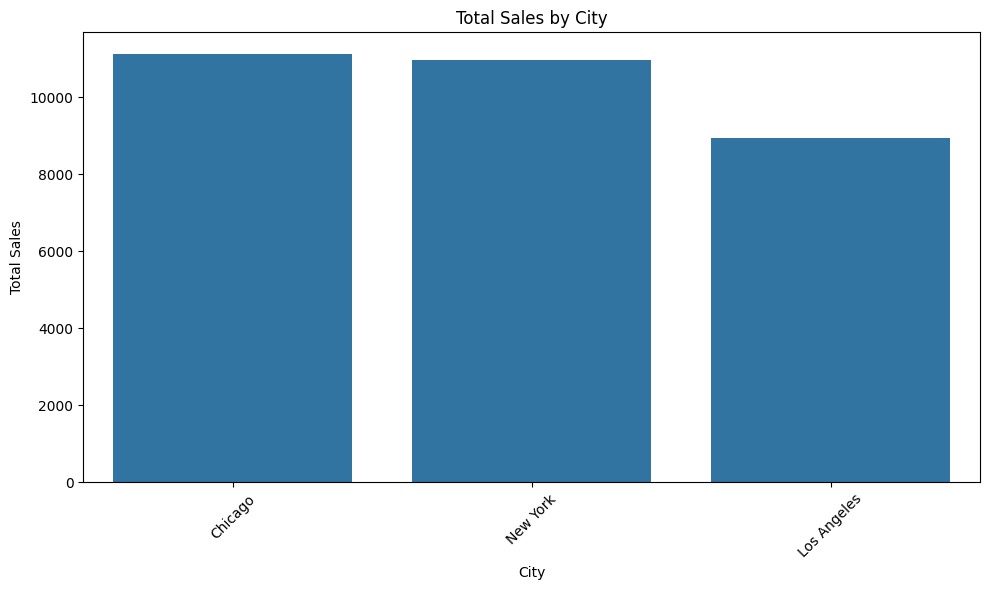

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

city_analysis_sorted = city_analysis.sort_values(by='total_sales', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='total_sales', data=city_analysis_sorted)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key insights:** The Bar chart (Total sales by City) provides a breakdown of sales performance across different cities.

Chicago has the highest total sales (11133.05).
New York has total sales (10964.42) which are slightly lower than Chicago's.
Los Angeles has the lowest total sales (8948.81) among the three cities.
These insights suggest that Chicago is the most profitable city in terms of  total revenue.

## Visualize sales by product category

Create a bar chart to visualize the total sales for each product category.


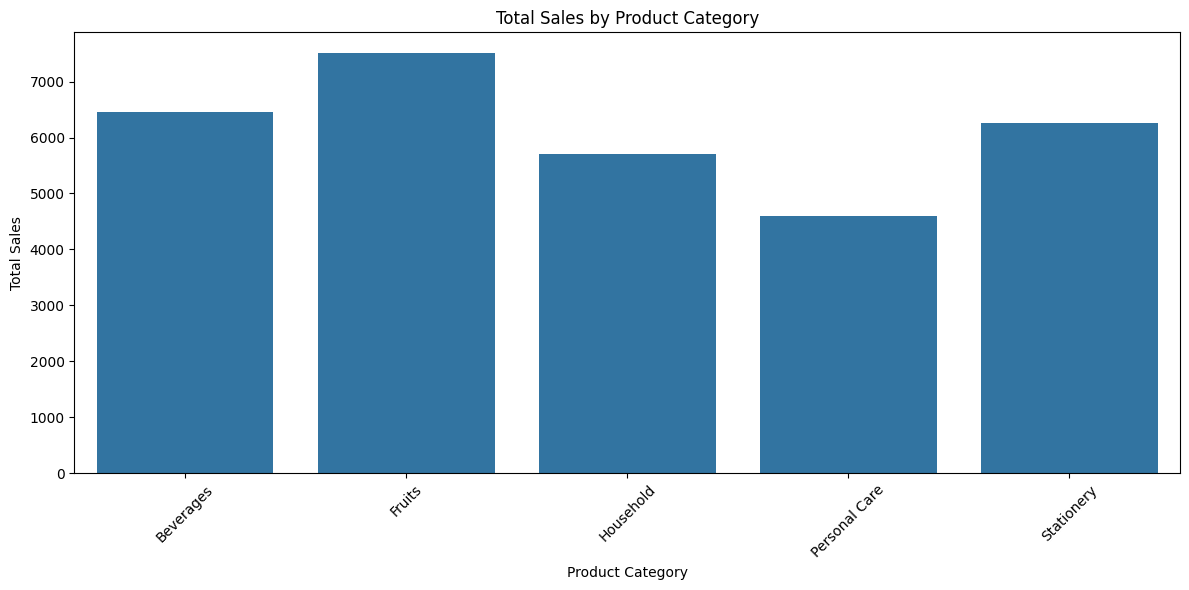

In [ ]:
# Group by product_category and calculate total sales
category_sales = product_analysis.groupby('product_category')['total_sales'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category', y='total_sales', data=category_sales)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Key Insights:** Fruits have the highest total sales, exceeding 7000, indicating strong demand in this category.
Beverages and Stationery follow with sales around 6000 each, showing a solid but slightly lower performance compared to Fruits.
Household products have moderate sales, around 5500, suggesting a steady but not leading market presence.
Personal Care has the lowest sales, approximately 4500, which may indicate weaker demand or less market penetration in this category.
This shows Fruits are the top-performing category.

## Visualize sales by customer type

Create a pie chart to visualize the total sales for each customer type.


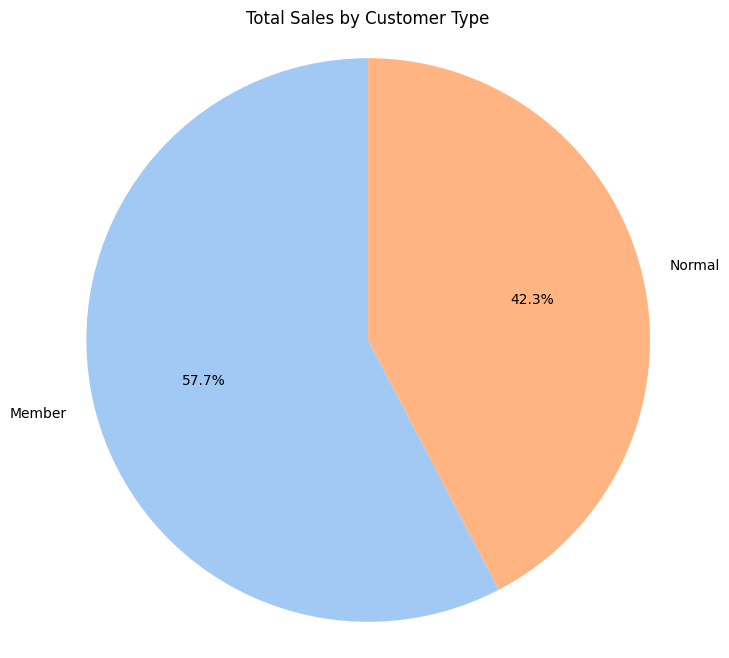

In [ ]:
# Create a pie chart for total sales by customer type
plt.figure(figsize=(8, 8))
plt.pie(customer_type_analysis['total_sales'], labels=customer_type_analysis['customer_type'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Total Sales by Customer Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Key Insights:** The Sales Analysis by Customer Type provides information about the sales performance of different customer segments.

We can see that 'Member' customers contribute significantly more to total sales (17855.87) compared to 'Normal' customers (13106.73).
In conclusion, 'Member' customers are more valuable for the business in terms of both total spending and frequency of visits. Company should focus on Member' customers and provide membership programs.